# Week 3 : Lab 
 ## Abstraction: Functions, parameters, arguments and scope
 ##### CS1P - University of Glasgow - John Williamson - 2016

In [47]:
from __future__ import division   # make division work like Python 3.x


## Lab exercise
**You must make a reasonble attempt at this exercise to gain a tick for this work**.

<font color="red"> Remember to save your work frequently! </font>



## Purpose of this lab
This lab will familiarise you with:
* Functions
* Returning values
* Parameterisation and default parameters
* Recursion.



## Before the lab

* Attempt at least the A problems.
* Read Chapter 3 of Think Like a Computer Scientist



## A. Quick Problems
### A.1 Bolts
<img src="imgs/bolts.jpg">
*[Photo credit: J Carriage Bolts via flickr.com CC-BY-SA]*

A certain type of bolt (the thing you screw a nut onto) weighs `(0.1 * radius) ** 2 * length` grams. 

You see a very dull report on bolts being coded by a junior programmer like this:

    print "The radius of an M6 bolt is 6mm and has diameter 12mm. A 20mm M6 bolt weighs 7.2 grams"
    
    print "The radius of an M8 bolt is 8mm and has diameter 16mm. A 20mm M8 bolt weighs 12.8 grams"
    
    print "The radius of an M6 bolt is 6mm and has diameter 12mm. A 40mm M6 bolt weighs 14.4 grams"

To avoid this copy-and-pasting, write a function that prints out the bolt report given the bolt size (e.g. 6, 8) and length (e.g. 20, 40). 

Replicate the report above without the repetition of code.

In [12]:
# Solution goes here

def bolt(radius,length):
    diameter = radius*2
    weight = str((0.1*radius)**2 * length)
    print "The radius of an M%d bolt is %dmm and has diameter %dmm. A %dmm M6 bolt weighs %s grams" %(radius, radius, diameter,length,weight)

r = int(raw_input("Bolt Radius (in mm): "))
l = int(raw_input("Bolt Length (in mm): "))
print ""

bolt(r,l)


Bolt Radius (in mm): 6
Bolt Length (in mm): 40

The radius of an M6 bolt is 6mm and has diameter 12mm. A 40mm M6 bolt weighs 14.4 grams


## A.2 Default parameters
Write a function `repstr` that takes a positional parameter `n` and an **optional keyword parameter** `char` and **returns** `n` repetitions of `char`, with `char` being `#` if not specified.

In [14]:
# Solution goes here
def repstr(n, char = '#'):
    repeat = char*n
    return repeat

In [15]:
## Tests
assert(repstr(5)=='#####')
assert(repstr(5, 'O')=='OOOOO')
assert(repstr(1, char='-')=='-')
assert(repstr(5, char='*')=='*****')
assert(repstr(2, char='--')=='----')
print "All OK!"

All OK!


### A.3 Rotate
Write a function `rotate(s)` that returns a string with the first character moved to the end. You can get all characters of a string except the first using `my_string[1:]`. If you're not sure what this means, try using this syntax before trying the rest of the exercise.

Write another function `all_rotates(s)`, which calls `rotate` `len(s)` times, printing each result, updating the string as it goes. The output for `steel` should be:

    steel
    teels
    eelst
    elste
    lstee
    
    

In [46]:
# Solution goes here
def rotate(s):
        s += s[0]
        s = s[1:]
        return s

def all_rotates(s):
    x = len(s)
    
    print s
    
    for i in range(x-1):
        s = rotate(s)
        print s
        
s = raw_input("Enter string to rotate: ")
print ""
all_rotates(s)
 

Enter string to rotate: steel

steel
teels
eelst
elste
lstee


## A.4 Refactor

Take the code below, and **refactor** it into a simpler form. This means to rewrite it by rearranging it to make it clearer and shorter. Functions make it easy to do this. Try to eliminate repetition and make clear the intention of the code, without relying so heavily on comments. **The code should explain itself**.

In [57]:
years = 20

## Work out how many units of three different kinds of item we can produce, given
## that the cost of production increases with inflation, 
## the cost of staff pay increases over time,
## and the income of the company producing the items increases over time

growth_rate = 0.005
income = 100
# compute new income rate
# growth rate is per month
for i in range(years*12):
    income = income * (1+growth_rate) 
    
unit_cost_1 = 20    
inflation = 0.03
# Compute unit cost for each item, accounting for inflation
# inflation is annual
for i in range(years):
    unit_cost_1 = unit_cost_1 * (1+inflation)
    
unit_cost_2 = 30 
for i in range(years):
    unit_cost_2 = unit_cost_2 * (1+inflation)    
    
unit_cost_3 = 40 
for i in range(years):
    unit_cost_3 = unit_cost_3 * (1+inflation)      
    
# Compute ataff pay costs 
pay = 10
pay_increase = 0.01
# pay increases are quarterly
for i in range(years*4):
    pay = pay * (1+pay_increase)
    
units_producable = (income - pay) / unit_cost_1
print "We can afford to make %d units of unit type 1" % units_producable    

units_producable = (income - pay) / unit_cost_2
print "We can afford to make %d units of unit type 2" % units_producable    

units_producable = (income - pay) / unit_cost_3
print "We can afford to make %d units of unit type 3" % units_producable    



We can afford to make 8 units of unit type 1
We can afford to make 5 units of unit type 2
We can afford to make 4 units of unit type 3


In [72]:
# Solution goes here

def income_cal(years, income, growth_rate):
    for i in range(years*12):
        income = income * (1+growth_rate) 
    return income

def unit_costing(unit_cost, inflation, years):
    for i in range(years):
        unit_cost = unit_cost * (1+inflation)
    return unit_cost

def staff_costing(staff_costs, pay_increase, years):
    for i in range(years*4):
        staff_costs = staff_costs * (1+pay_increase)
    return staff_costs
               
def units_producable(income,staff_costs,unit_costs):
    total_units = (income-staff_costs)/unit_costs    
    return total_units

def max_unit_production(unit_cost, unit_type, years = 20, inflation = 0.03, month_growth_rate= 0.005, month_income = 100, staff_costs = 10, pay_increase = 0.01):
    
    income = income_cal(years, month_income, month_growth_rate,)
    total_unit_costs = unit_costing(unit_cost, inflation, years)
    total_staff_costs = staff_costing(staff_costs, pay_increase, years)
    total_units = units_producable(income,total_staff_costs,total_unit_costs)
    
    print "We can afford to make %d units of unit type %d " %(total_units, unit_type)
               
max_unit_production(20, 1 )
max_unit_production(30, 2 )
max_unit_production(40, 3 )  

            
               
    
    


We can afford to make 8 units of unit type 1 
We can afford to make 5 units of unit type 2 
We can afford to make 4 units of unit type 3 


### A.5 Recursive loop
Rewrite:

    for i in range(10):
        print i
        
using recursion instead of `for`.  Check that you get the same output as the loop above. Don't make an off-by-one error!

In [78]:
# Solution goes here
def rec(ranges,number=0):
    if number == ranges:
        return
    else:
        print number
        number+=1
        rec(ranges,number)

r = int(raw_input("Enter range: "))
print''

rec(r)

Enter range: 10

0
1
2
3
4
5
6
7
8
9


## B. A tattoo parlour
You've joined a company opening a new "digital tattoo" parlour. 

<img src="imgs/tattoo.jpg">
*[Image credit: Blast 707 Photography via flickr.com CC-BY 2.0]*

As part of this, you've been tasked with developing a range of new customised tattoos for each client. The parlour is a rather dodgy operation and works on a shoestring budget, so you need to be able to knock together complicated-looking tattoo designs with very little effort.

You need to build up the tattoo from two parts:
* a mandala (a circular design with repeated shapes)
* some lettering

To make it possible to franchise the business quickly, you have to assume the tattoo artist has no idea what he or she is doing. But the tattooist will be capable drawing simple things like lines, and inking in regions.  You just have to tell the artist how to put these together into a design you can charge money for. 

When you've finished, you should be able to quickly turn out beautiful tattoos like this:
<img src="imgs/cheap_tats.png">

## B.1 Geometric design

There are a few commands you can use to control the tattoo operation. These are the **API** (application programmers interface), which tells you what functions are available. You can create a tattooist with

    t = Tattoist() # make a new tattoo artist
    
And then you can use the following functions.

* `t.move_to(x,y)` move the tattoo gun `x` units right and `y` units up
*  `t.line_to(x,y)` as `move_to`, but inks a line between the old and new points
* `t.rotate(angle)` rotates **all future inking** by `angle` degrees.
* `t.scale(scale)` scales **all future inking** by the given `scale` factor. 1.0=unchanged, 2.0=double size, 0.5=half size, etc.
* `t.begin_ink()`   start a inked-in region. All `line_to` and `move_to` commands will now define a region to be filled in until `end_ink()` occurs.
* `t.end_ink()`   end an inked-in region, closing the shape, and applying the ink to shade it.   
*  `t.store()` remember where we are and which way we are facing, and what the scaling is.
*  `t.recall()`  restore the last stored position, direction and scale.
    
    
## Dimensions
Note that the size of the space you have to work with is from (-100,-100) to (100,100).

In [4]:
## MAKE SURE YOU RUN THIS CELL!
import tattoo
%matplotlib inline
tattoo = reload(tattoo)
from tattoo import Tattooist, get_shape, load_font
import random

For example, the following code draws a single line:

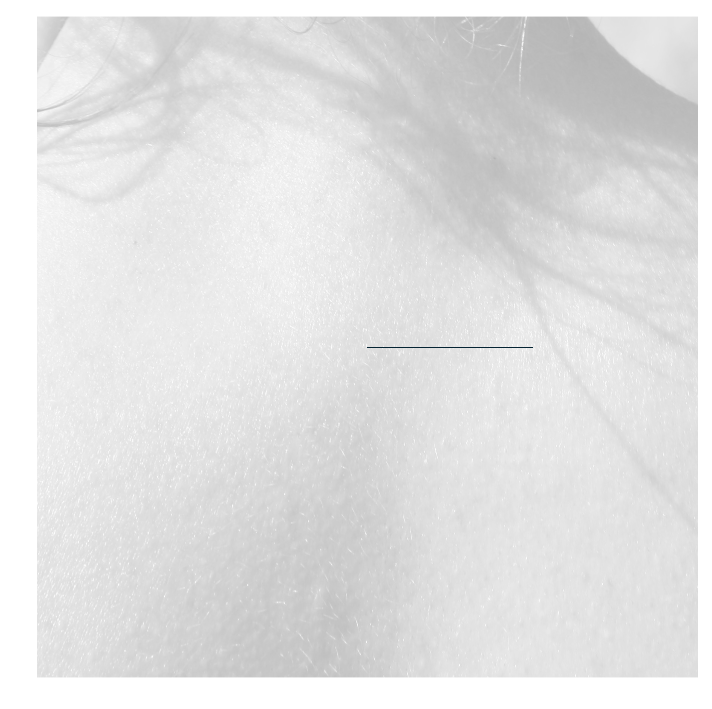

In [5]:
t = Tattooist()
t.line_to(50,0)

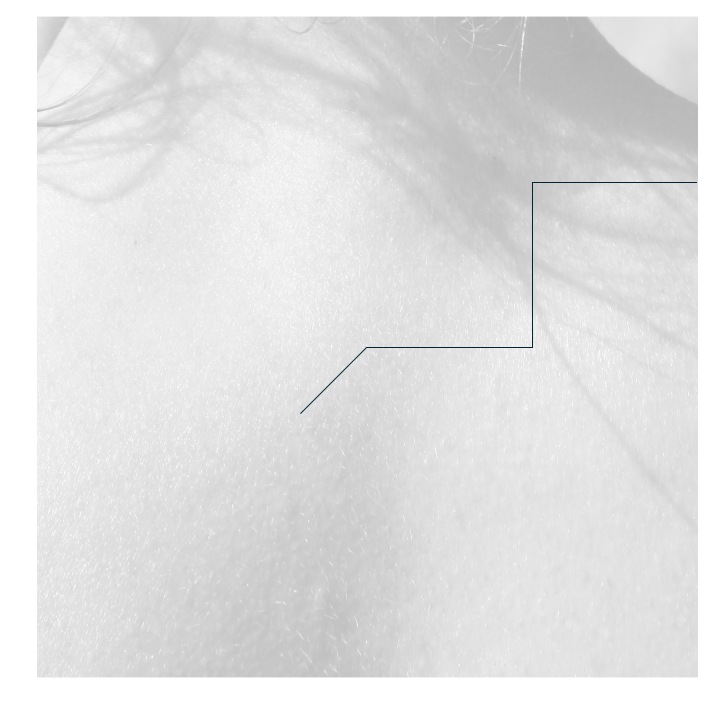

In [7]:
# four line segments
t = Tattooist()
# note that these movements are *relative*
t.store() # remember where we were
t.line_to(50,0)
t.line_to(0,50)
t.line_to(50,0)
t.recall()# jump back to where we last stored
t.line_to(-20,-20)

## A hexagon
This code draws a filled in hexagon (how does this work?). Make sure you understand what is going on in this example before going further. **Try modifying it to draw a square instead of a hexagon.**

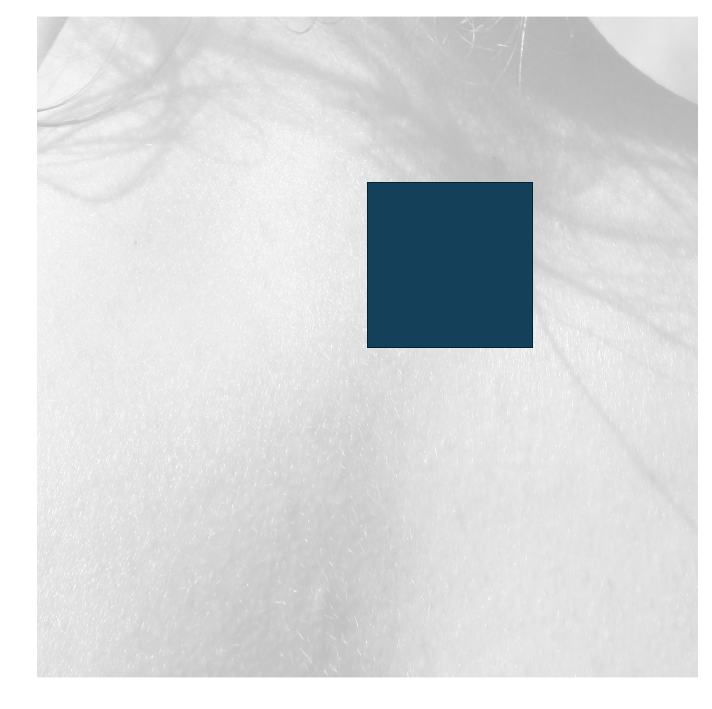

In [8]:
hex_size = 50
t = Tattooist()

t.move_to(hex_size,0)
t.begin_ink()
for i in range(4):    
    t.line_to(0, hex_size)
    t.rotate(90)
t.end_ink()

## Task 1
Write a function which inks in a shape. There are a bunch of shapes provided for you. Use `get_shape()` to get a shape. For example, 
    
        get_shape("circle")
        
returns the points to draw a circle. There is a list of available shapes below.

Each is a list of x,y pairs specifying the `line_to` commands to draw to make up the shape.

You can iterate through all of the points in a shape using a loop like:

    for x,y in shape:
        # do stuff
        
#### Available shapes        
The following shapes are available:
* hexagon
* bullet
* spike
* star5
* star6
* circle
* ellipse
* dash
* teardrop
* roundhex
* roundstar6
* tribal_1
* tribal_2
* tribal_3
* tribal_4    
    
    
### NOTE
Your drawing function should take the **Tattooist** to do the drawing as a parameter. Don't rely on global variables to pass in the tattooist value.

In [ ]:
# Solution goes here

t = Tattooist()

def tattooing():
    shape = raw_input('Enter shape of tattoo: ')
    draw_tattoo(shape)
       
def draw_tattoo(shape):
    locations= get_shape(shape)
    t.begin_ink()
    for x,y in locations:
        t.line_to(x,y)
    t.end_ink()
              
tattooing()   

### Task 2: Mandala
A **mandala** is a circular design, which has a number of repeated shapes arranged radially around a point. A mandala consists of a number of **rings**. Each ring has a certain radius, and a number of repeated shapes, as well as a *scale* which changes how big the individual shapes are.

<img src="imgs/mandala.png" width="300px">

This **mandala** uses only ellipses, but varies the number of repetitions and the scale of the ellipses in three different **rings**.


A **mandala** is just a set of **mandala rings**.


* Write a function `mandala_ring()` that can draw a mandala ring. Parameterise it so that you can control the radius, shape, shape scale and number of shapes in each ring.

Remember that `rotate()` and `scale()` change all future drawing commands. You need to use store() and recall() to restore the position to what it was after drawing a mandala element!

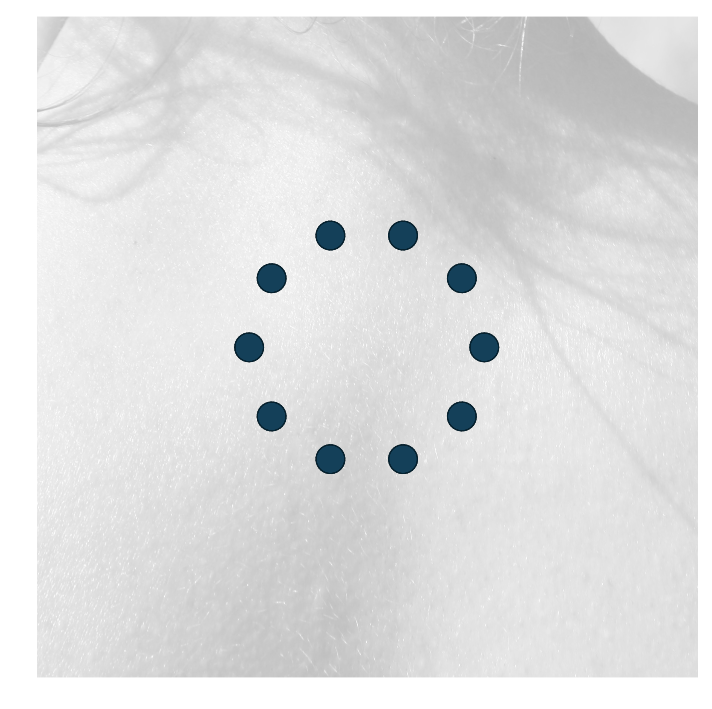

In [66]:
# Solution goes here
t = Tattooist()
    
def draw_tattoo(shape):
    locations= get_shape(shape)
    t.begin_ink()
    for x,y in locations:
        t.line_to(x,y)
    t.end_ink()
    
def draw_manadala(radius,shape,scaling, num_shapes ):
    t.scale(scaling)
    for i in range(num_shapes):
        t.store()
        t.rotate(360/num_shapes *i)
        t.move_to(radius, 0)
        draw_tattoo(shape)
        t.recall()
        

        
        

draw_manadala(200,"circle",0.2,10)  
#draw_ellipse(0.6) 


### Task 3: Full mandala
Then, write a function which can draw an entire mandala. Decide how to parameterise this function to allow mandalas of different designs to be drawn.

You may wish to use random numbers (or another function) to decide how to draw each ring. Remember that you can use 

    random.uniform(min, max)
    
to generate a random number between `min` and `max`. (e.g. `random.uniform(0,1)` will return a value between 0 and 1)

Your function should call `mandala_ring()`!

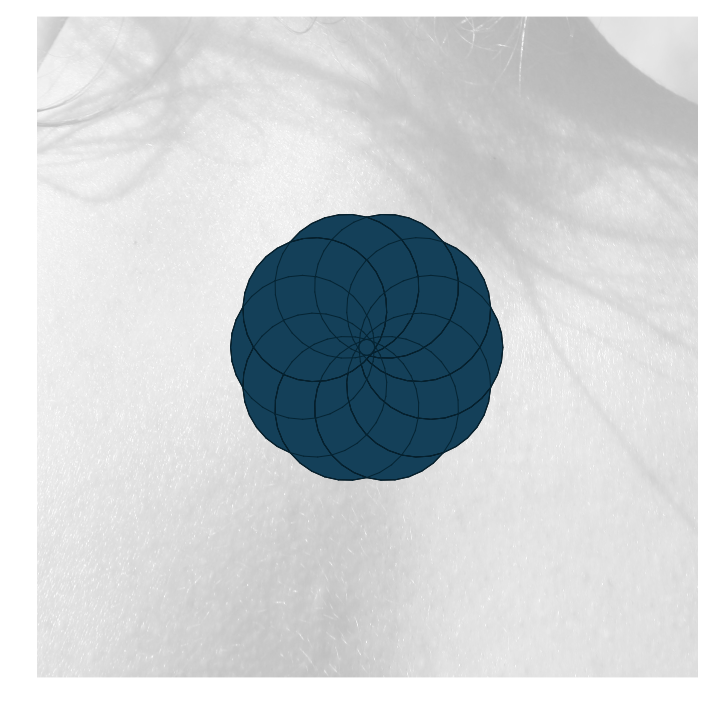

In [87]:
# Solution goes here
import random
t = Tattooist()

def full_mandala(shape,num_rings):
    for i in range(2):
        num_of_shapes = random.randint(0,10)
        scale = 1
        radius = random.uniform(0,
        draw_manadala(radius,shape,scale,num_of_shapes)
        
full_mandala("circle", 3)
    
    

## B.2 Text
There is a handy function which provides letters that you can tell the tattooist to draw. Unfortunately, all they give is a sequence of line coordinates for each letter, and whether you should move without inking, or ink the line. You have to tell the tattooist each individual line to ink to make up the letter.

Luckily, the template for letters is very easy to work with. You can find the next `line_to` or `move_to` command to use with a simple `for` loop (we will see how this works in the next lecture):

    for x, y, pen in letter_coords:
        # do something
        
If `pen` is True, then draw a line; otherwise, you should move without drawing a line. After drawing a letter, the drawing position will be in the right place to draw the next letter. 

*You can't fill in these letters -- just outline them.*

To load a font, use `myfont = font.load(font_name)`, as below. You can then get the sequence of coordinates (`letter_coords`) for a given letter with syntax like `myfont['k']` to get the outline for `k`.

In [35]:
myfont = load_font("futural") # simple font
print "k", myfont['k'] # the outline for k
# this is a list of (x,y,pen) groups
ch = 'o'
print "o", myfont[ch] # the outline for the variable ch (here, 'o')

## Task
* Write a function to outline one letter.

* Then, write a function which will draw an entire string onto the tattoo, starting at the current position. Remember you can iterate through the characters of a string using `for`. The function should take a parameter telling the tattooist where to start inking in the lettering.

* You can use t.scale() to change the size of all future drawing. For example, t.scale(2.0) will double the current drawing size. Add an *optional* parameter to your function to allow the scale of the text to be specified.

You can choose from a number of fonts:
* **futural** Simple clean font
* **scripts** Script font
* **timesr** Serif font
* **gothicger** Heavy gothic font
* **japanses** Japanaese characters

(if you look in the `hershey-fonts` directory you can find more font names you can use).

In [36]:
# Solution goes here

## B.3 All together
Draw all of the elements at once to generate the final tattoo form. Write a single function `generate_tattoo()` which can generate the whole tattoo. It should take parameters specifying the mandala design, and the position, font and content of the text to be written on.

Think about how you can give control over the design while keeping the number of parameters under control.

In [40]:
# Solution goes here

## Extension (OPTIONAL)
* Add an optional parameter to your function, which if set, draws the text around a circle outside of the mandala.
* Allow the text to be centered. *Hint*: The only way to do this is to iterate through the drawing coordinates for a sequence of text, and find out how big it is going to be, then shift back by half of that before drawing it.
* The code you have written does not respect newlines in the text. Modify it so the tattoo text can be split over multiple lines by putting the newlines in the input string.

-------------

# C Extended problems
These *extended* problems are optional for students who are keen to learn more. If you've finished the whole lab and want to explore these ideas in more depth, these problems and resources are intended to help you do that. <font color="red"> You do not need to attempt any of this section to receive a tick! </font>


# C.1 Variable arguments
We know how to pass a fixed number of arguments to a function, and we can make some or all of those optional.

In [ ]:

def fn(a, b=0):
    return a + b

fn(10, 10) # fine b=10
fn(10) # fine b=0

But what if we didn't know how many arguments we wanted to send in advance? Python allows **unpacking** to pass a variable number of arguments to a function. The `*` symbol can be used before a parameter name to "collect up" all left-over arguments into a list:

In [24]:
def print_all(*args):
    # args is now a *list* of all the arguments
    for arg in args:
        print arg,
    print
        
print_all(1)
print_all(1,2,3)
print_all("variable", "argument")

We can have a mix of positional and variable arguments. But note that `*args` must come **after** any fixed positional arguments.

In [25]:
def print_all_prefix(prefix, *args):
    for arg in args:
        print prefix, arg, 
    print
    
print_all_prefix(">",1)
print_all_prefix(">",1,2,3)


Similarly, we can pass a list or sequence of values to any function by using `*args`. In this case, the `*` appears in the call. The receiver does not need to have specified `*args`; as long as the number of arguments matches the expected number of parameters, everything works fine:

In [26]:
def fn_two(a,b):
    print a + b
    
fn_two(*[1,2]) # exactly the same as fn(1,2)

arg_list = ["man", "glue", "gran"]
print_all_prefix("super", *arg_list)

## Task
Use this knowledge to write three functions (equivalents are built into Python already, but write these yourself):

       # returns a list of the given values
       map_fn(fn, *args)  transformed by fn
       
       # just calls fn with args as the parameter list
       apply_fn(fn, *args) 
       
       # assuming fn is a function with two arguments,
       # repeatedly calls fn on the current value and the
       # next value from args until all values are consumed
       reduce_fn(fn, *args) 

In [42]:
# Solution goes here

In [43]:
## Tests

def make_super(x): 
    return "super"+x

def concat(x,y):
    return x+y

def nth(n, *args):
    return [arg[n] for arg in args]


assert(map_fn(make_super, "man", "glue", "gran")==["superman", "superglue", "supergran"])
# should return ["superman", "superglue", "supergran"]

assert(apply_fn(nth, 1, "five", "six", "seven")==['i','i','e'])
# should return ["i","i","e"]

assert(reduce_fn(concat, "-==", "[-]", "==-")=='-==[-]==-')
# should return "-==[-]==-"

## **kwargs
If you're interested in reading further, look up how to use `**kwargs` to pass and receive *keyword* arguments to functions using *dictionaries*.

`*args` and `**kwargs` are very useful when you need to propagate some parameters from a "wrapper" function into code that actually performed the operation.

# C.2 Mutual recursion
We've seen simple recursion, when a function makes a call to itself. But we can have **mutual recursion**, where one function calls another, which calls the first one back, and so on. The data gets passed back and forth via parameters and return values like a ping-pong ball in a table tennis match.

## Task
The following example can be solved easily with iteration or simple recursion. But try writing in a mutually recusive form.

The Collatz sequence is a sequence of values given by the rule, starting from a number *n*:
* if n is == 1, stop
* otherwise, if n is even, half it
* otherwise n = n*3+1

Write three functions `collatz()`, `half()` and `tripleadd()` which do the following:
* `collatz` if n!=1, prints n and calls either `half()` or `tripleadd()`
* `half` halves `n` and calls `collatz()`
* `tripleadd` computes `3n+1` and then calls `collatz()`

**`collatz()` should not have a return statement in it!**



In [50]:
# Solution goes here

## Extension
Plot the number of iterations taken to get to 1 as a function of the starting value *n*. 

You can check your graph against the one here http://paulbourke.net/fractals/oneness/ (called *oneness* in this context). And consider this xkcd comic: https://xkcd.com/710/ :)